# Data anaylsis

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
colors_image_formats= ["#F6511D", "#3B8EA5","#7FB800","#9e73ff"]
color_browsers = ["#EE6352","#59CD90","#3fa7d6","#FAC05E","#F79D84","#5e5e5e"]

## Aggregate data

In [3]:
folder_path = "./raw_data/websites/"
df_combined = pd.DataFrame()
file_list = os.listdir(folder_path)
column_names = ["run_id","browser","image_format","FP","FCP","TTFB","PLT","fetch_time"]

df_csv_concat = pd.concat([pd.read_csv(folder_path + file, names=column_names) for file in file_list], ignore_index=True)
df_csv_concat = df_csv_concat.sort_values(["run_id"])
df_csv_concat.to_csv("combined_website_performance_data.csv",index=False)

print(df_csv_concat.head)

<bound method NDFrame.head of       run_id        browser image_format         FP    FCP       TTFB   PLT  \
0          1         chrome          png  undefined  191.2       13.7  1515   
789        2          opera          png  undefined  594.6       11.5  1614   
394        3        firefox          png  undefined  143.0         25  1624   
1188       4  edge_chromium          png  undefined  161.5       12.3  1685   
1584       5         safari          png  undefined  260.0         52  1543   
...      ...            ...          ...        ...    ...        ...   ...   
393     1974         chrome         webp  undefined   81.3  undefined   219   
1187    1975          opera         webp  undefined  137.3  undefined   354   
788     1976        firefox         webp  undefined  123.0          8   255   
1583    1977  edge_chromium         webp  undefined  192.2        8.6   221   
1977    1978         safari         webp  undefined  260.0         50   456   

      fetch_time  
0 

# Visualization of data

### Only images without browsers

In [4]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()
    
    # print statistics 
    print("Statistics for " + metric + " by image format")
    print(df.groupby("image_format")[metric].describe())
    

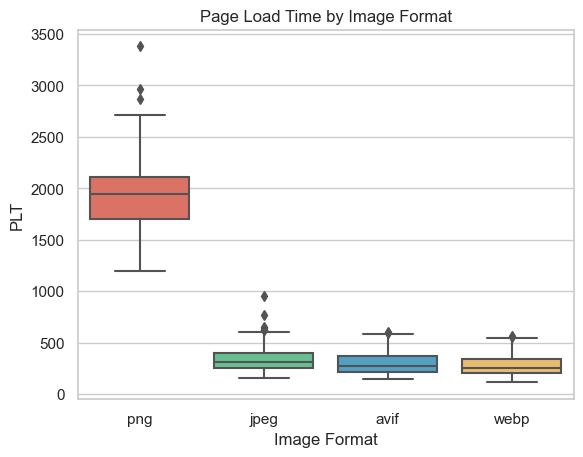

Statistics for PLT by image format
              count         mean         std     min     25%     50%      75%  \
image_format                                                                    
avif          496.0   301.997984  103.891503   147.0   218.0   270.5   365.25   
jpeg          498.0   336.692771  107.116064   157.0   258.0   312.0   399.50   
png           485.0  1934.663918  304.454879  1199.0  1703.0  1942.0  2113.00   
webp          499.0   279.559118   98.364487   114.0   203.5   257.0   341.00   

                 max  
image_format          
avif           602.0  
jpeg           949.0  
png           3377.0  
webp           566.0  


In [5]:
visualize_metrix_boxplot_by_image_format("PLT")

### Metric Boxplot per Image_format 

In [6]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, hue="browser",palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

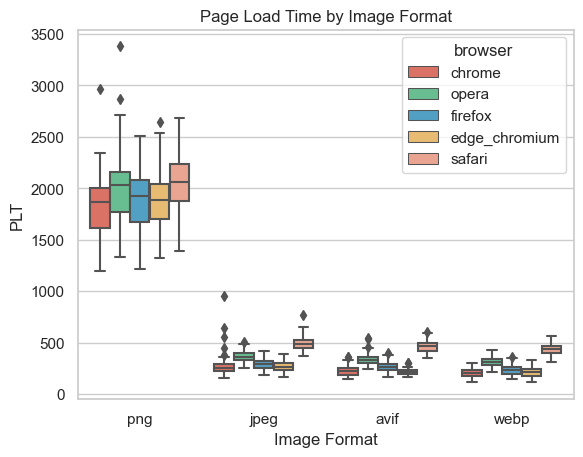

In [7]:
visualize_metrix_boxplot_by_image_format("PLT")

### Boxplot per metric and BROWSER

In [8]:
def boxplot_per_metric_and_browser(metric,browser):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["browser"]==browser]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=colors_image_formats)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

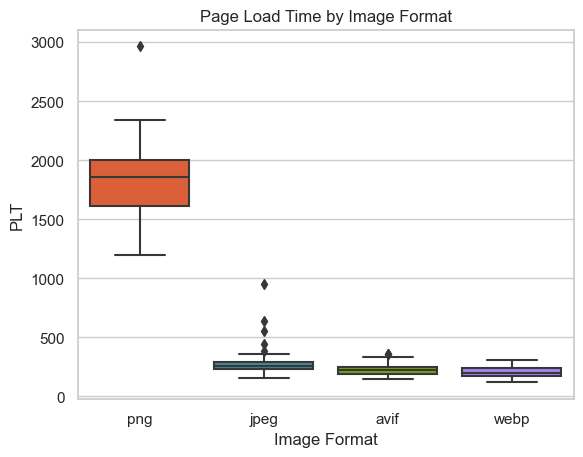

In [9]:
boxplot_per_metric_and_browser('PLT', 'chrome')

### Boxplot per metric and IMAGE_FORMAT

In [10]:
def boxplot_per_metric_and_browser(metric,image_formats):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["image_format"].isin(image_formats)]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="browser", y=metric, hue="image_format", palette="Set1")
    plt.xlabel("Browser")
    plt.ylabel(metric)  
    plt.show()

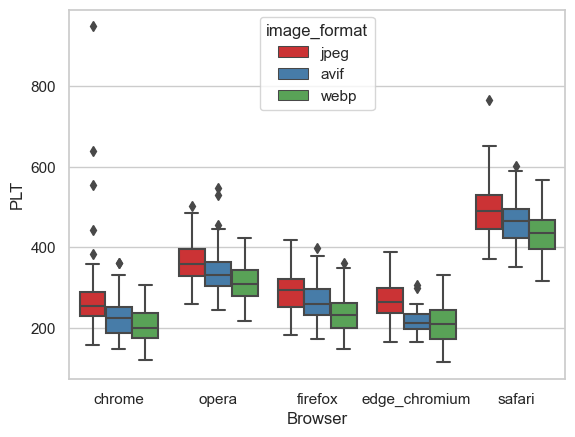

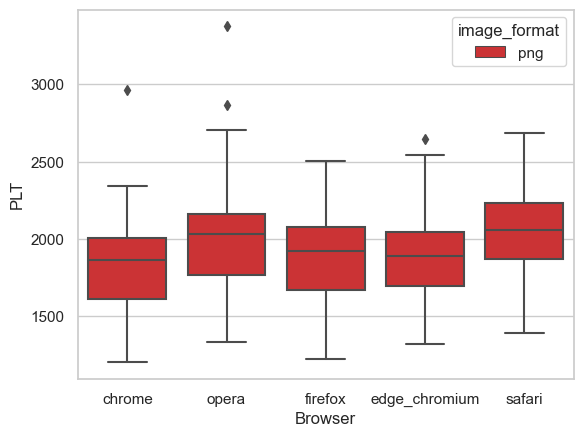

In [11]:
boxplot_per_metric_and_browser("PLT",["jpeg","avif","webp"])
boxplot_per_metric_and_browser("PLT",["png"])

## Combine PLT per Browser and Image Format

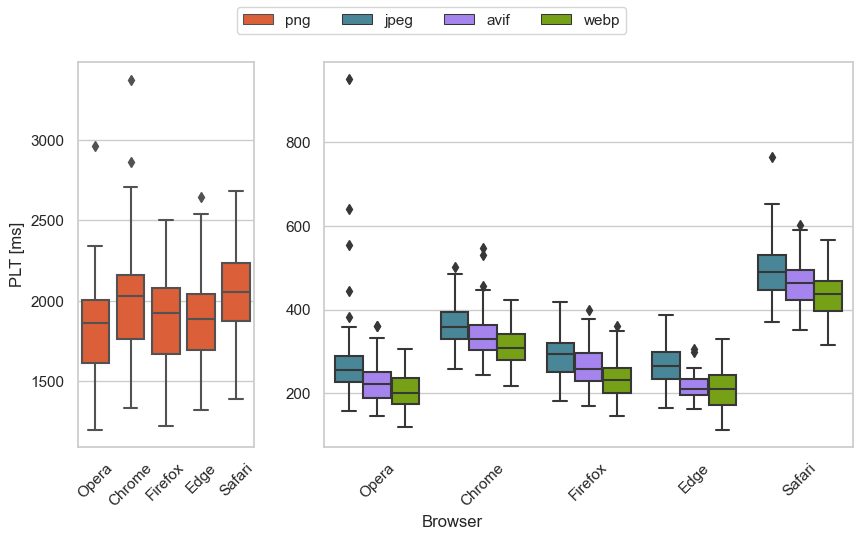

In [12]:
colors_image_formats= ["#F6511D", "#3B8EA5","#9e73ff","#7FB800"]

df = pd.read_csv("combined_website_performance_data.csv")
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [1, 3]})
fig.text(0.5, -0.05, 'Browser', ha='center')

sns.set(style="whitegrid")
df_left = df[df["image_format"].isin(["png"])]
ax = sns.boxplot(ax=axes[0], data=df_left, x="browser", y="PLT", palette=colors_image_formats[0:1], hue="image_format",saturation=0.75,)
ax.set_ylabel("PLT [ms]")
ax.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge", "Safari"], rotation=45)
ax.set_xlabel("")
ax.legend([],[], frameon=False)


df_right = df[df["image_format"].isin(["jpeg","avif","webp"])]
ax2 = sns.boxplot(ax=axes[1], data=df_right, x="browser", y="PLT", hue="image_format", palette=colors_image_formats[1:4],saturation=0.75,)
ax2.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge","Safari"], rotation=45)
ax2.legend([],[], frameon=False)
ax2.set_xlabel("")
ax2.set_ylabel("")

lines = []
labels = []
counter = 0

for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    lines.extend(Line)
    labels.extend(Label)
  
# rotating x-axis labels of last sub-plot
plt.xticks(rotation=45)
  
fig.legend(lines, labels, loc='upper center', ncol=4, fancybox=True)
plt.show()


One-Way-Anova between image formats per Browser

In [13]:
# One-Way Anova for one browser and image format
metric = "PLT"
df = pd.read_csv("combined_website_performance_data.csv")
size = 60

browsers = ["opera","chrome","firefox","edge_chromium","brave","safari"]
image_formats = ["png","jpeg","webp","avif"]

for browser in browsers:
    df_browser = df[df["browser"] == browser]
    png = df_browser[df_browser["image_format"] == "png"].sample(n=size, random_state=1)
    jpg = df_browser[df_browser["image_format"] == "jpeg"]
    webp = df_browser[df_browser["image_format"] == "webp"]
    avif = df_browser[df_browser["image_format"] == "avif"]
    
    print("Browser: ", browser)
    print(stats.f_oneway(png[metric], jpg[metric], webp[metric], avif[metric]))

    # f_oneway returns F-statistic and p-value
    print("- PNG: ", stats.normaltest(png[metric]))
    print("- JPG: ", stats.normaltest(jpg[metric]))
    print("- WEBP: ", stats.normaltest(webp[metric]))
    print("- AVIF: ", stats.normaltest(avif[metric]))   
    # print mean and Q1 and Q3
    print("-- PNG: (Q1: ", np.quantile(png[metric], 0.25), ", mean: ", np.median(png[metric]), ", Q3: ", np.quantile(png[metric], 0.75), ")")
    print("-- JPG: (Q1: ", np.quantile(jpg[metric], 0.25), ", mean: ", np.median(jpg[metric]), ", Q3: ", np.quantile(jpg[metric], 0.75), ")")
    print("-- WEBP: (Q1: ", np.quantile(webp[metric], 0.25), ", mean: ", np.median(webp[metric]), ", Q3: ", np.quantile(webp[metric], 0.75), ")")
    print("-- AVIF: (Q1: ", np.quantile(avif[metric], 0.25), ", mean: ", np.median(avif[metric]), ", Q3: ", np.quantile(avif[metric], 0.75), ")")
    



Browser:  opera
F_onewayResult(statistic=1801.7427301174505, pvalue=8.937654681538373e-215)
- PNG:  NormaltestResult(statistic=11.19074699534178, pvalue=0.003715011528188652)
- JPG:  NormaltestResult(statistic=1.2755726824493758, pvalue=0.5284609624401446)
- WEBP:  NormaltestResult(statistic=2.2524310074367495, pvalue=0.3242580908087333)
- AVIF:  NormaltestResult(statistic=21.59315324413744, pvalue=2.046945829363947e-05)
-- PNG: (Q1:  1728.25 , mean:  2050.5 , Q3:  2207.25 )
-- JPG: (Q1:  328.75 , mean:  359.0 , Q3:  395.25 )
-- WEBP: (Q1:  278.75 , mean:  307.5 , Q3:  342.25 )
-- AVIF: (Q1:  303.75 , mean:  330.5 , Q3:  364.0 )
Browser:  chrome
F_onewayResult(statistic=2453.94904476569, pvalue=1.577100361761417e-235)
- PNG:  NormaltestResult(statistic=2.9266267602172036, pvalue=0.23146806107131954)
- JPG:  NormaltestResult(statistic=125.1623827016538, pvalue=6.627258722469442e-28)
- WEBP:  NormaltestResult(statistic=2.7124391774473398, pvalue=0.2576328965972197)
- AVIF:  NormaltestRes

ValueError: a must be greater than 0 unless no samples are taken

# Two-Way-Anova

In [14]:
df = pd.read_csv("combined_website_performance_data.csv")

model = ols('PLT ~ C(browser) + C(image_format) + C(browser):C(image_format)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

# https://www.statology.org/two-way-anova-python/ 
# Both image_format and browser are significant and not depend 

,sum_sq,df,F,PR(>F)
C(browser),1.403839e+07,4.0,148.803978,3.207639e-111
C(image_format),9.725640e+08,3.0,13745.295102,0.000000e+00
C(browser):C(image_format),5.084323e+05,12.0,1.796425,4.359856e-02
Residual,4.618017e+07,1958.0,NaN,NaN
